In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
"""img = cv2.imread('IMG_9125.tif',0)
#rows, cols = img.shape
plt.imshow(img, cmap = 'gray')
print(img.shape)"""


"img = cv2.imread('IMG_9125.tif',0)\n#rows, cols = img.shape\nplt.imshow(img, cmap = 'gray')\nprint(img.shape)"

In [2]:
def retFrames(name, number):
    imgArr = []
    for i in range(1,number+1):
        imgArr.append(cv2.imread(name +" (" + str(i) + ").tif",-1))
        
    #print(np.shape(imgArr))
    #print(imgArr[0])
    
    return imgArr

def averageFrames(imgArr):
    avgFrame = np.sum(imgArr, axis = 0)/(len(imgArr))
    #print(avgFrame)
    #print(np.shape(avgFrame))
    return avgFrame

def averagePixel(img):
    total = 0
    for i in range(0,len(img)):
        total = total + np.sum(img[i])/len(img[0])
    avg = total/len(img)
    return avg

def saveMaster(name, number, filename):
    cv2.imwrite(filename, averageFrames(retFrames(name,number)))

    
def calcGain(flat1, flat2, bias1, bias2, bitDepth, verbose = 0):
    #pixel averaging
    if verbose == 1:
        fig1 = plt.figure(1)
        hist = cv2.calcHist([flat1],[0],None,[2**(bitDepth)],[0,2**(bitDepth)])
        plt.plot(hist)
        fig1.show()
        fig2 = plt.figure(2)
        hist = cv2.calcHist([bias1],[0],None,[2**(bitDepth)],[0,2**(bitDepth)])
        plt.plot(hist)
        fig2.show()
    
    avgFlatPixel = averagePixel(flat1) + averagePixel(flat2)
    print("avg flat pixel " + str(avgFlatPixel))
    avgBiasPixel = averagePixel(bias1) + averagePixel(bias2)
    #calculating difference images
    flatDiff = (flat1 - flat2 + 2**(bitDepth - 1)).flatten()
    biasDiff = (bias1 - bias2 + 2**(bitDepth - 1)).flatten()
    #plotting difference distribution
    counts, bins = np.histogram(flatDiff,20)
    print(np.sum(counts))
    #plt.plot(bins[:20], counts, label = "diff histo")
    #Same thing as aove but with an opencv method instead of numpy
    fig3 = plt.figure(3)
    hist = cv2.calcHist([flat1 - flat2 + 2**(bitDepth - 1)],[0],None,[2**(bitDepth)],[0,2**(bitDepth)])
    plt.plot(hist)
    fig3.show()
    print(np.sum(hist.T))

    #calculating standard deviation of difference image                                               
    stdFlat = np.std(flatDiff)
    print(stdFlat)
    stdBias = np.std(biasDiff)
    #calculating e/ADU
    corrMean = avgFlatPixel - avgBiasPixel
    corrVar = stdFlat*stdFlat - stdBias*stdBias
    eADU = corrMean/corrVar
    
    return eADU, corrMean, corrVar

def calcGain1Frame(flat1):
    avgPixel = averagePixel(flat1)
    flatFlat = flat1.flatten()
    plt.hist(flatFlat,100)
    stdFlat = np.std(flatFlat)
    Gain = avgPixel/(stdFlat*stdFlat)
    return Gain, avgPixel, stdFlat*stdFlat

True

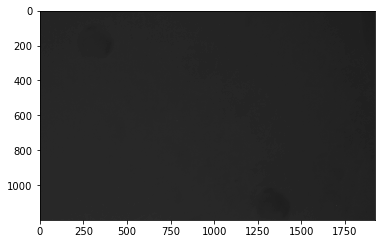

In [3]:
plt.imshow(averageFrames(retFrames("Test/flats 1 G100/flats 1 G100",29)),cmap = 'gray')
cv2.imwrite("Mflat 1 G100.png", averageFrames(retFrames("Test/flats 1 G100/flats 1 G100",29)))

In [4]:
img = retFrames("Test/flats 0.25/flats 0.25",31)
#print(np.shape(img))
#print(img)

In [5]:
img = np.asarray(img).transpose(1,2,0)
#print(np.shape(img))
#print (img)

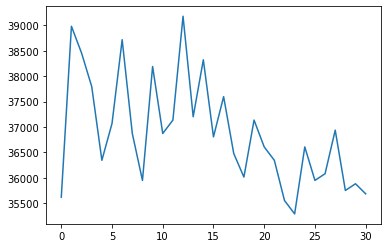

In [6]:
plt.plot(img[0][0])

In [7]:
#reading as a 16 bit file gain set at 25
img2 = cv2.imread("Test/flats 1 G25 new/flats 1 G25 new (15).tif",-1)
img1 = cv2.imread("Test/flats 1 G25 new/flats 1 G25 new (16).tif",-1)
bias1 = cv2.imread("Test/bias 0.01ms G25/bias 0.01ms G25 (10).tif",-1)
bias2 = cv2.imread("Test/bias 0.01ms G25/bias 0.01ms G25 (9).tif",-1)
print(averagePixel(img2))
print(averagePixel(img1))

32589.17319921882
34077.84835590275


avg flat pixel 66667.02155512158
2304000
2304000.0
963.9863642081064


d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.07174130482303127, 66667.02155512158, 929269.7103791639)

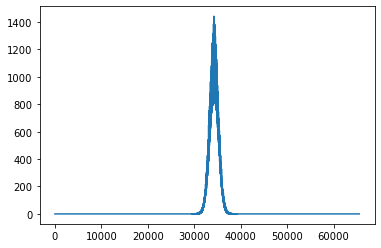

In [8]:
calcGain(img1,img2,bias1,bias2,16)

In [9]:
print(np.max(img2))

65535


avg flat pixel 259.4221306423611
2304000
2304000.0
3.787614628555105


d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(18.083206904892958, 259.4221306423611, 14.346024574444625)

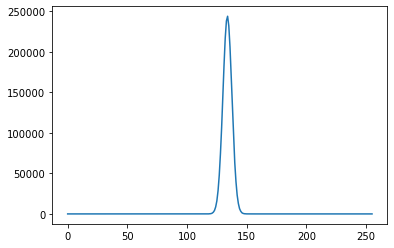

In [10]:
#reading as a 8 bit file gain set at 25
img2 = cv2.imread("Test/flats 1 G25 new/flats 1 G25 new (15).tif",0)
img1 = cv2.imread("Test/flats 1 G25 new/flats 1 G25 new (16).tif",0)
bias1 = cv2.imread("Test/bias 0.01ms G25/bias 0.01ms G25 (10).tif",0)
bias2 = cv2.imread("Test/bias 0.01ms G25/bias 0.01ms G25 (9).tif",0)
calcGain(img1,img2,bias1,bias2,8)

avg flat pixel 56366.894870225704
2304000
2304000.0
1057.1879515526878


d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.05043356882823764, 56366.894870225704, 1117646.364908168)

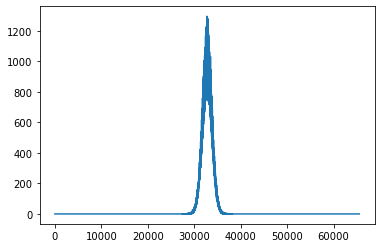

In [11]:
#reading as a 16 bit file gain set at 50
img2 = cv2.imread("Test/flats 1 new/flats 1 new (10).tif",-1)
img1 = cv2.imread("Test/flats 1 new/flats 1 new (9).tif",-1)
bias1 = cv2.imread("Test/bias 0.01ms/bias 0.01ms (10).tif",-1)
bias2 = cv2.imread("Test/bias 0.01ms/bias 0.01ms (9).tif",-1)
calcGain(img1,img2,bias1,bias2,16)

In [12]:
print(bias1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


avg flat pixel 219.18831727430558
2304000
2304000.0
4.155693665837667


d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(12.692008371304059, 219.18831727430558, 17.26978984428331)

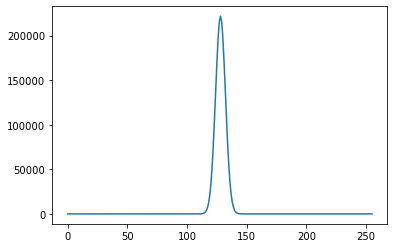

In [13]:
#reading as a 8 bit file gain set at 50
img2 = cv2.imread("Test/flats 1 new/flats 1 new (10).tif",0)
img1 = cv2.imread("Test/flats 1 new/flats 1 new (9).tif",0)
bias1 = cv2.imread("Test/bias 0.01ms/bias 0.01ms (10).tif",0)
bias2 = cv2.imread("Test/bias 0.01ms/bias 0.01ms (9).tif",0)
calcGain(img1,img2,bias1,bias2,8)

avg flat pixel 64622.437248263894
2304000
2304000.0
1612.9640711085167


d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.024838990786371345, 64622.437248263894, 2601653.09468696)

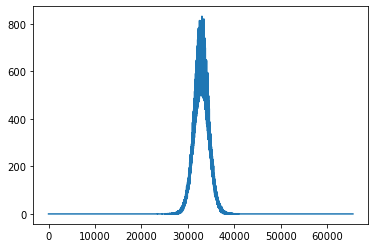

In [14]:
#reading as a 16 bit file gain set at 100
img2 = cv2.imread("Test/flats 1 G100/flats 1 G100 (10).tif",-1)
img1 = cv2.imread("Test/flats 1 G100/flats 1 G100 (9).tif",-1)
bias1 = cv2.imread("Test/bias 0.01 G100/bias 0.01 G100 (10).tif",-1)
bias2 = cv2.imread("Test/bias 0.01 G100/bias 0.01 G100 (9).tif",-1)
calcGain(img1,img2,bias1,bias2,16)

In [15]:
print(bias1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


avg flat pixel 251.441657986111
2304000
2304000.0
6.31027244690104


d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(6.314529710264835, 251.441657986111, 39.81953835411844)

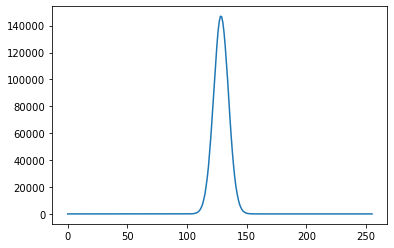

In [16]:
#reading as a 8 bit file gain set at 100
img2 = cv2.imread("Test/flats 1 G100/flats 1 G100 (10).tif",0)
img1 = cv2.imread("Test/flats 1 G100/flats 1 G100 (9).tif",0)
bias1 = cv2.imread("Test/bias 0.01 G100/bias 0.01 G100 (10).tif",0)
bias2 = cv2.imread("Test/bias 0.01 G100/bias 0.01 G100 (9).tif",0)
calcGain(img1,img2,bias1,bias2,8)

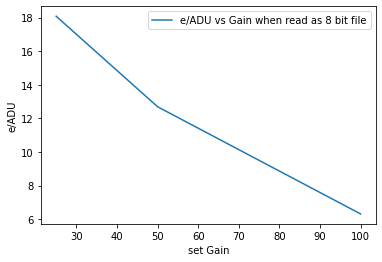

In [17]:
plt.plot([25, 50, 100],[18.08, 12.69, 6.31], label = "e/ADU vs Gain when read as 8 bit file")
plt.ylabel("e/ADU")
plt.xlabel("set Gain")
plt.legend()

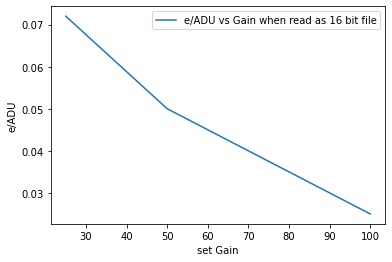

In [18]:
plt.plot([25, 50, 100],[0.072, 0.05,0.025], label = "e/ADU vs Gain when read as 16 bit file")
plt.ylabel("e/ADU")
plt.xlabel("set Gain")
plt.legend()

# Canon 200D linearity ISO 400

In [104]:
startr = 1750
stopr = 2250

startc = 2750
stopc = 3250

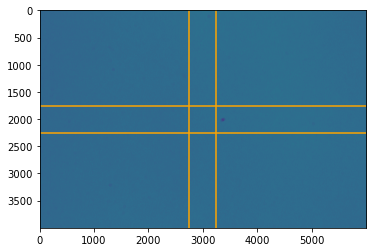

In [106]:
img2 = cv2.imread("Test/canon CMOS/IMG_9648.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9649.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)

plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")


avg flat pixel 26764.04736400002
250000
250000.0
1368.9741486821538


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.014370935206823624, 26653.95493200002, 1854712.6229714095)

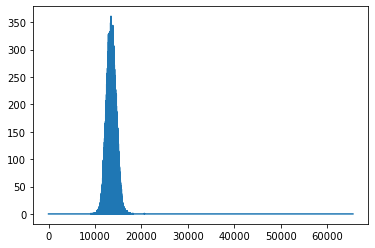

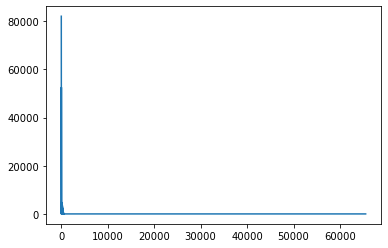

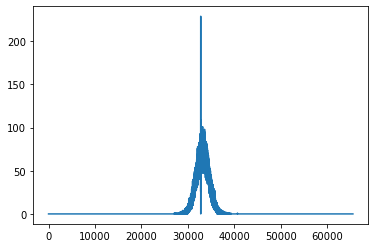

In [107]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

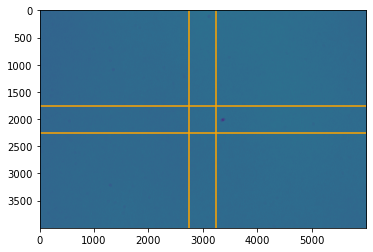

In [108]:
import rawpy as rp

img2 = cv2.imread("Test/canon CMOS/IMG_9650.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9651.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 46197.44738000003
250000
250000.0
1429.6754927082684


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.022763746924295784, 46087.35494800003, 2024594.4176620117)

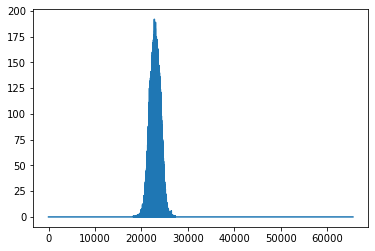

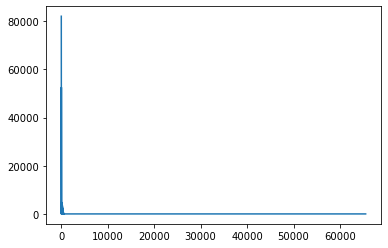

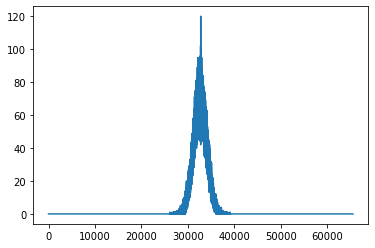

In [109]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

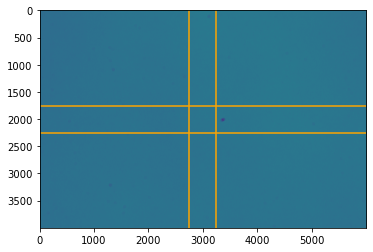

In [110]:
import rawpy as rp

img2 = cv2.imread("Test/canon CMOS/IMG_9653.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9654.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 72519.024464
250000
250000.0
1286.7119274018953


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.044252976374453336, 72408.932032, 1636249.987329682)

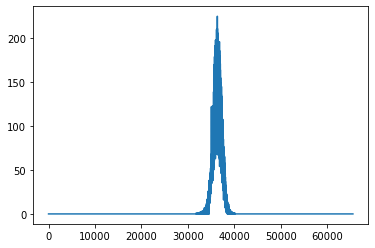

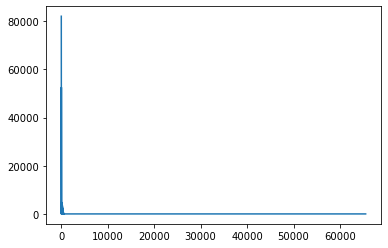

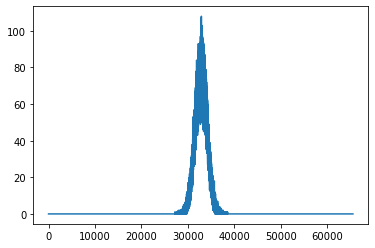

In [111]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

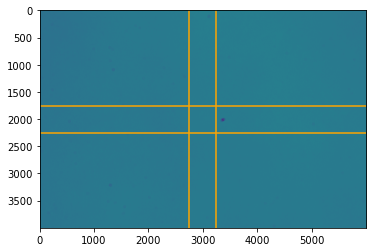

In [112]:
import rawpy as rp

img2 = cv2.imread("Test/canon CMOS/IMG_9655.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9656.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 99557.53483199996
250000
250000.0
785.4623643234285


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.16641875447488175, 99447.44239999996, 597573.5289799321)

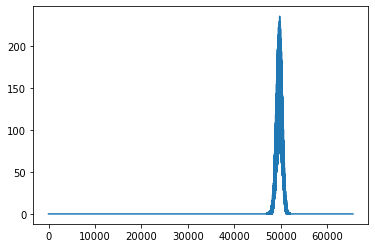

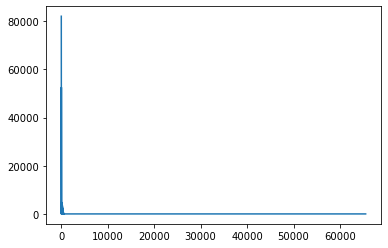

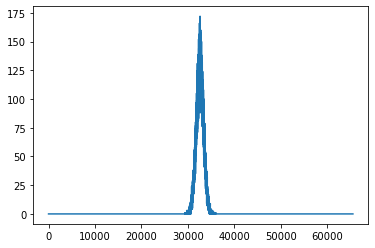

In [113]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

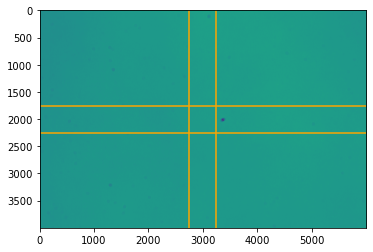

In [114]:


img2 = cv2.imread("Test/canon CMOS/IMG_9657.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9658.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 124540.28978400004
250000
250000.0
172.6109271712775


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(11.944990795253302, 124430.19735200003, 10416.935390309893)

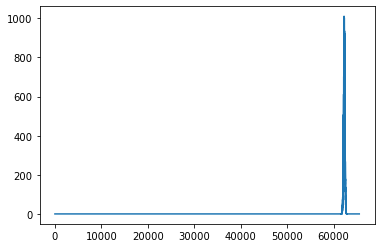

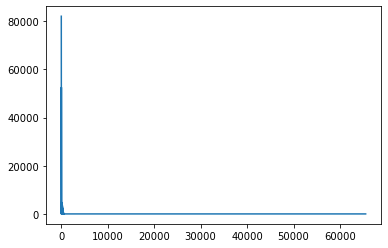

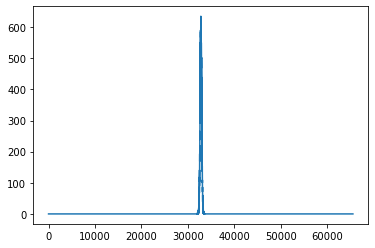

In [115]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

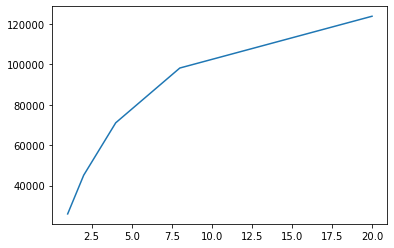

In [29]:
plt.plot([1,2,4,8,20],[25955,45103,71051,98158,123788], label = "linearity")

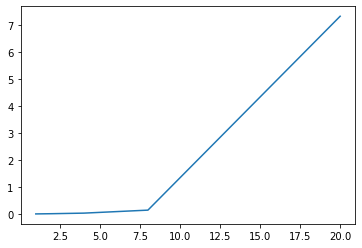

In [30]:
plt.plot([1,2,4,8,20],[0.014,0.022,0.043,0.154,7.32], label = "Gain vs exposure")

## ISO 800

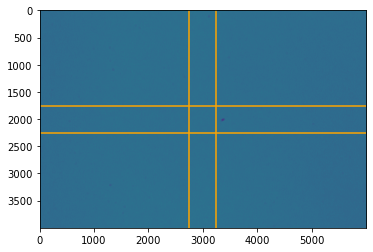

In [119]:


img2 = cv2.imread("Test/canon CMOS/IMG_9665.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9666.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9730.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9731.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 30883.65001600001
250000
250000.0
2075.1662733019452


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.007281976868468316, 30662.22184000001, 4210700.252670463)

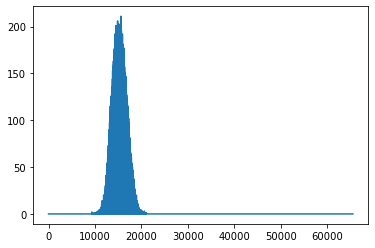

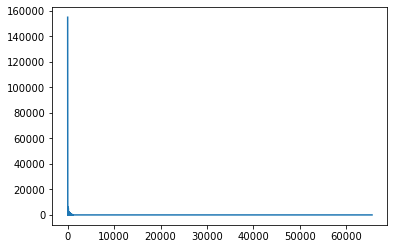

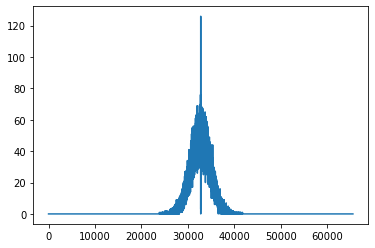

In [120]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

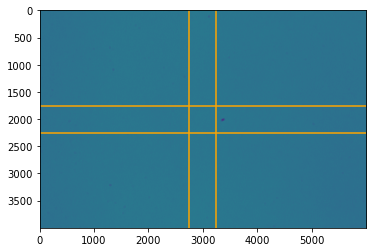

In [121]:


img2 = cv2.imread("Test/canon CMOS/IMG_9667.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9668.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9730.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9731.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 51853.75078000002
250000
250000.0
2048.3244009686273


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.012593193998110626, 51632.322604000015, 4100018.042424065)

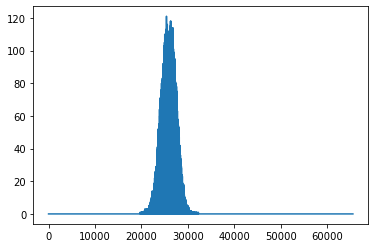

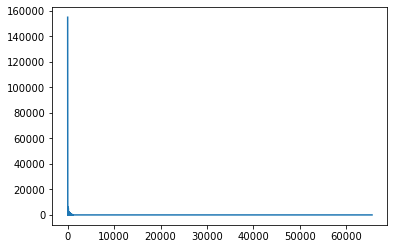

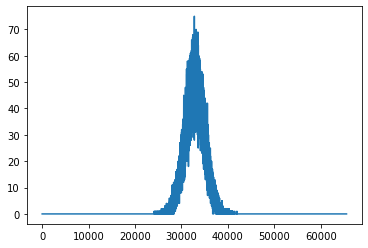

In [122]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

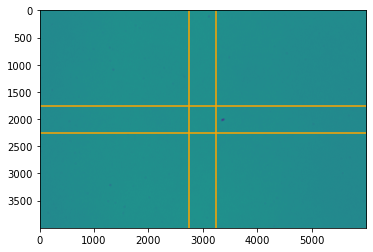

In [123]:


img2 = cv2.imread("Test/canon CMOS/IMG_9670.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9671.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9730.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9731.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 79141.72901200005
250000
250000.0
1662.7176282636594


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.029569072416319904, 78920.30083600005, 2669015.1021593083)

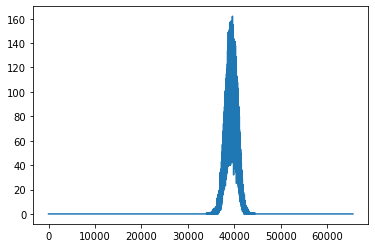

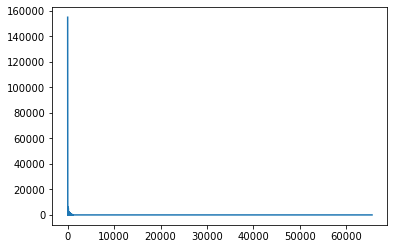

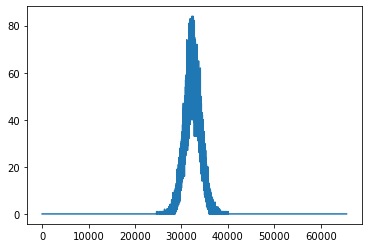

In [124]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

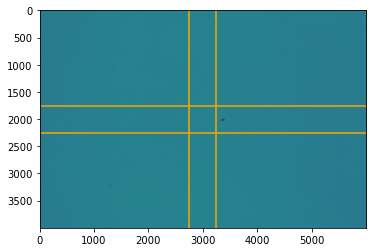

In [125]:


img2 = cv2.imread("Test/canon CMOS/IMG_9672.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9673.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9730.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9731.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 105253.08165999997
250000
250000.0
961.4475422167085


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.1267324933628347, 105031.65348399997, 828766.5672551291)

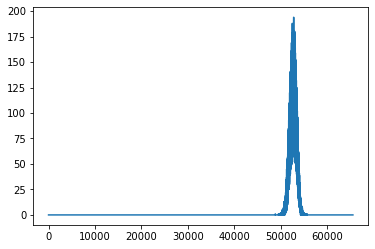

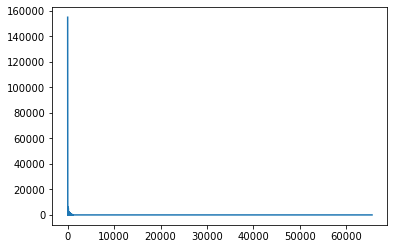

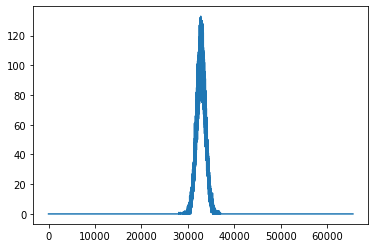

In [126]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

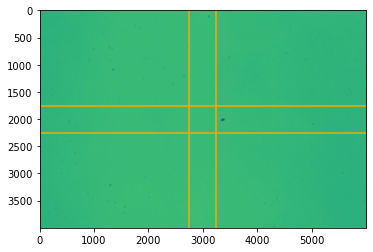

In [127]:


img2 = cv2.imread("Test/canon CMOS/IMG_9674.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9675.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9730.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9731.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 123561.566656
250000
250000.0
298.2575545954605


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(-18.527217406579226, 123340.13848, -6657.240306156309)

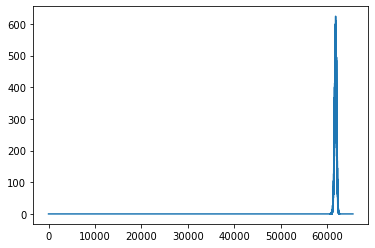

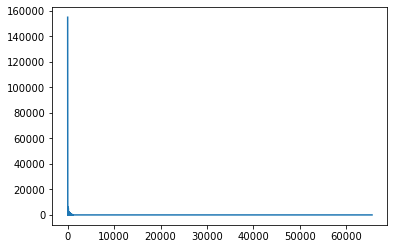

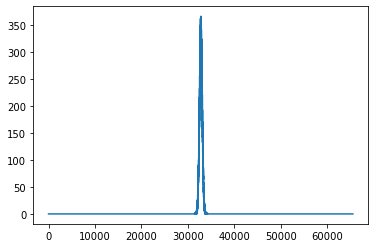

In [128]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

# ISO 200

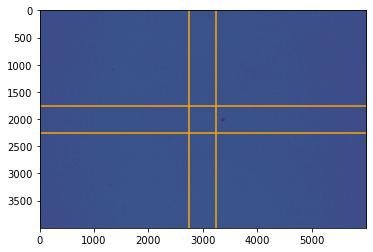

In [129]:
img2 = cv2.imread("Test/canon CMOS/IMG_9678.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9679.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9676.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9677.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



uint16
avg flat pixel 11187.220520000004
250000
250000.0
650.4604853769539


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.026658195612750447, 11106.873144000005, 416640.0946764625)

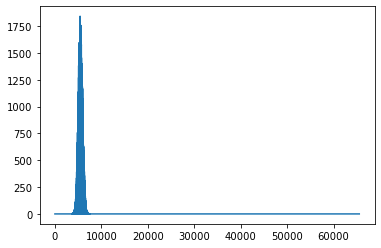

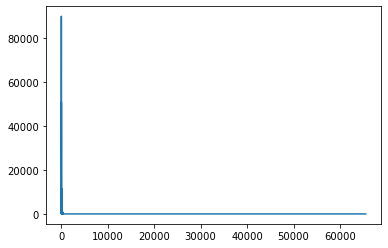

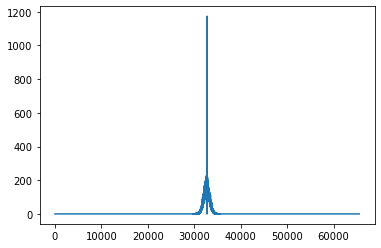

In [130]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
print(img1.dtype)
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

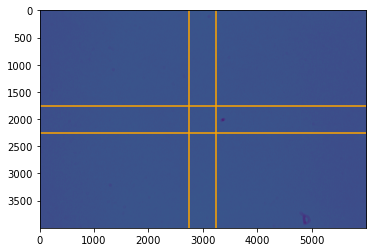

In [131]:


img2 = cv2.imread("Test/canon CMOS/IMG_9680.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9681.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9676.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9677.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")



avg flat pixel 22613.307616000006
250000
250000.0
842.039621705837


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.032072102225152714, 22532.960240000004, 702571.9761621492)

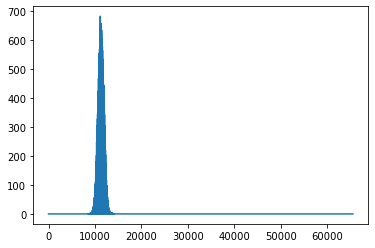

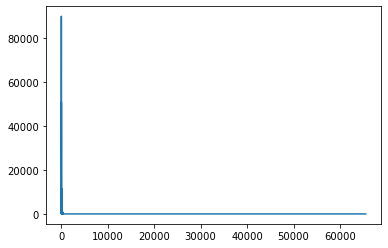

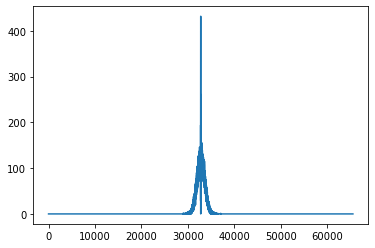

In [132]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

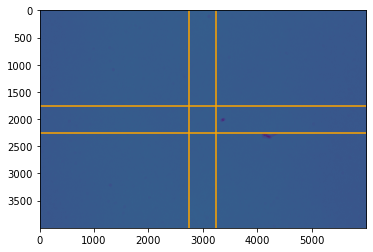

In [133]:


img2 = cv2.imread("Test/canon CMOS/IMG_9682.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9683.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9676.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9677.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")


avg flat pixel 40876.00151600002
250000
250000.0
941.556335395792


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.046355032448372455, 40795.65414000002, 880069.5843635931)

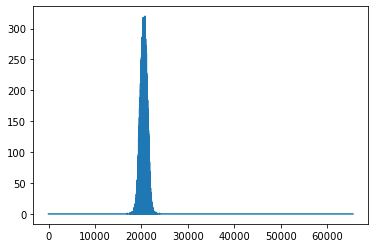

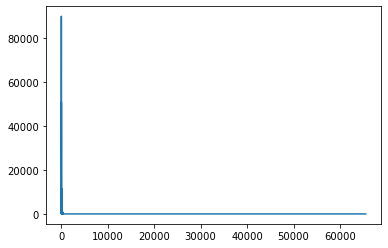

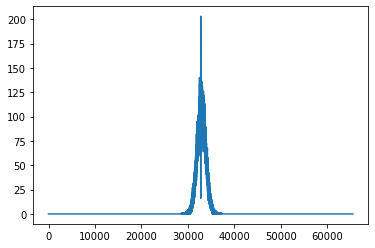

In [134]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

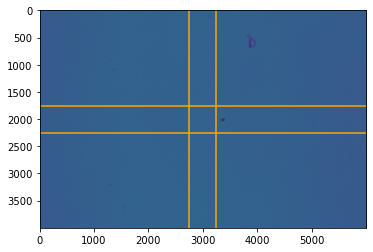

In [135]:


img2 = cv2.imread("Test/canon CMOS/IMG_9684.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9685.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9676.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9677.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")


avg flat pixel 66027.58903600002
250000
250000.0
908.6057294550997


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.08051127936258384, 65947.24166000001, 819105.6232382739)

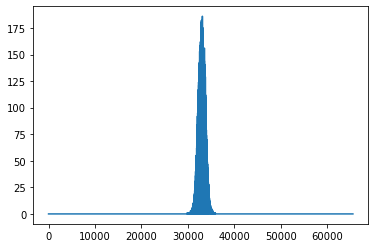

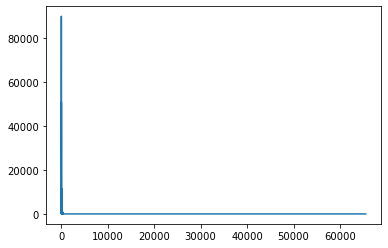

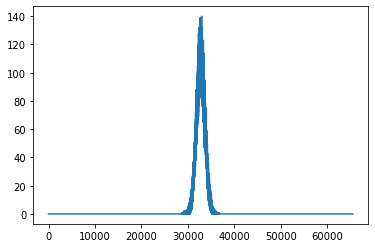

In [136]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

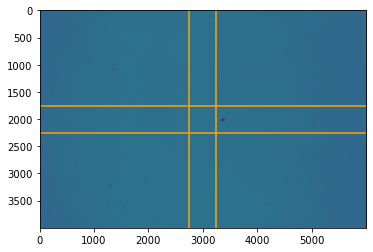

In [137]:


img2 = cv2.imread("Test/canon CMOS/IMG_9686.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9687.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9676.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9677.tif",-1)
plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")


avg flat pixel 93827.29300799994
250000
250000.0
592.5487469736936


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.2720020670367636, 93746.94563199993, 344655.26917973446)

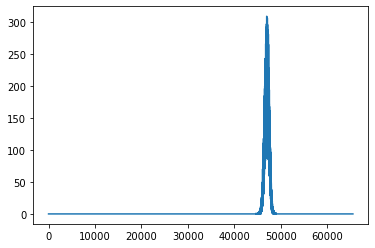

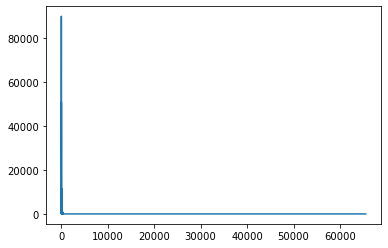

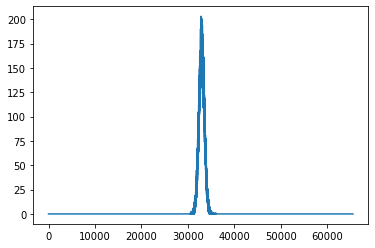

In [138]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

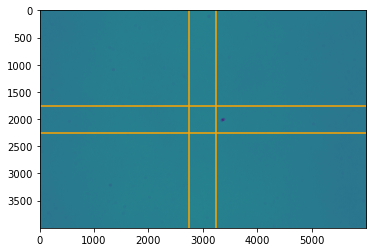

In [139]:


img2 = cv2.imread("Test/canon CMOS/IMG_9688.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9689.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9676.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9677.tif",-1)

plt.imshow(img1[:,:,1]/2**16)
plt.axhline(startr, color = "orange")
plt.axhline(stopr, color = "orange")
plt.axvline(startc, color = "orange")
plt.axvline(stopc, color = "orange")


avg flat pixel 109776.88980000005
250000
250000.0
388.0518900933978


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.7611180978140518, 109696.54242400004, 144125.52104469854)

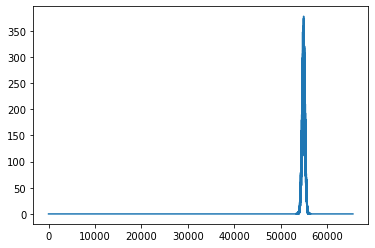

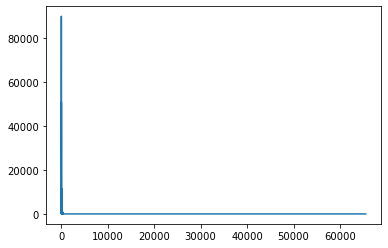

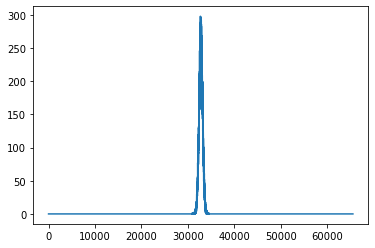

In [140]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

# Skyris linearity

# # 16 bit data (0)

In [35]:
from astropy.io import fits

In [36]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 1s 16b/diffused flats G100 1s 16b_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 1s 16b/diffused flats G100 1s 16b_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300

Filename: Test/Test/2 march/diffused flats G100 1s 16b/diffused flats G100 1s 16b_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   int16   


[[1215 1211 1215 ... 1133 1149 1095]
 [1174 1141 1145 ... 1124 1153 1100]
 [1203 1145 1165 ... 1132 1108 1133]
 ...
 [1137 1124 1178 ... 1120 1141 1178]
 [1174 1124 1174 ... 1124 1141 1095]
 [1128 1100 1199 ... 1133 1157 1112]]
[[1186 1170 1194 ... 1137 1157 1087]
 [1227 1157 1120 ... 1100 1133 1112]
 [1194 1120 1199 ... 1136 1124 1083]
 ...
 [1207 1141 1161 ... 1149 1174 1149]
 [1178 1166 1166 ... 1071 1157 1079]
 [1190 1178 1166 ... 1174 1149 1120]]
[[1215 1211 1215 ... 1128 1174 1149]
 [1174 1141 1145 ... 1170 1145 1087]
 [1203 1145 1165 ... 1157 1165 1169]
 ...
 [1149 1161 1115 ... 1140 1195 1144]
 [1133 1170 1140 ... 1174 1093 1127]
 [1182 1157 1169 ... 1112 1161 1107]]
[[1186 1170 1194 ... 1186 1194 1108]
 [1227 1157 1120 ... 1170 1190 1100]
 [1194 1120 1199 ... 1173 1186 1144]
 ...
 [1174 1083 1161 ... 1157 1149 1153]
 [1133 1137 1165 ... 1170 1149 1119]
 [1141 1112 1141 ... 1061 1161 1111]]
uint16
avg flat pixel 2318.8814111111133
90000
90000.0
31.409462230964657


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(2.3504852897122084, 2318.8814111111133, 986.5543176383952)

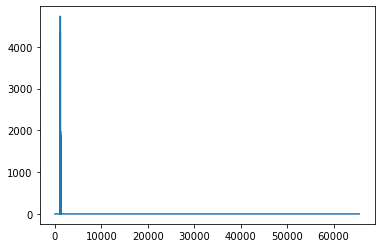

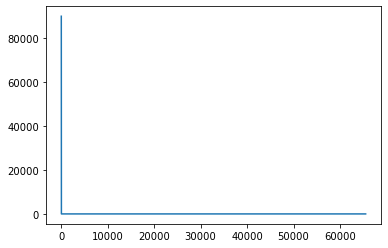

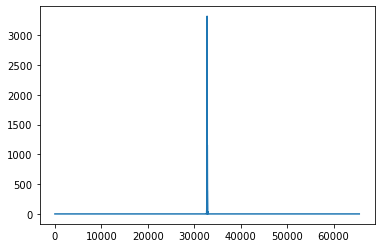

In [37]:
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)
img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
print(img1)
print(img2)
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)


Filename: Test/Test/2 march/diffused flats G100 2s 16b/diffused flats G100 2s 16b_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   int16   
[[2539 2288 2473 ... 2543 2543 2255]
 [2638 2333 2605 ... 2349 2387 2370]
 [2366 2411 2386 ... 2527 2267 2477]
 ...
 [2535 2300 2726 ... 2493 2457 2329]
 [2667 2370 2659 ... 2580 2391 2556]
 [2259 2341 2403 ... 2514 2457 2226]]
[[2391 2481 2535 ... 2316 2374 2444]
 [2354 2349 2651 ... 2494 2391 2246]
 [2618 2349 2502 ... 2277 2156 2457]
 ...
 [2457 2506 2312 ... 2410 2597 2403]
 [2349 2523 2424 ... 2444 2354 2547]
 [2543 2238 2490 ... 2279 2333 2601]]


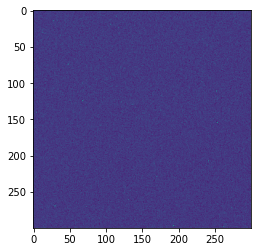

In [38]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 2s 16b/diffused flats G100 2s 16b_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 2s 16b/diffused flats G100 2s 16b_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 4888.392088888886
90000
90000.0
182.5820997525331


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.1466390498673645, 4888.392088888886, 33336.22315004395)

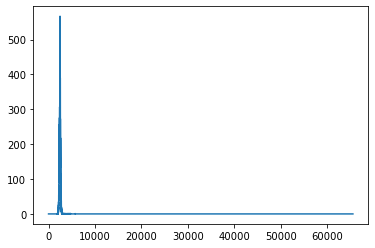

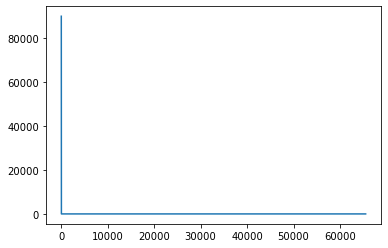

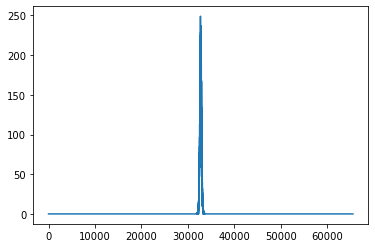

In [39]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

Filename: Test/Test/2 march/diffused flats G100 4s 16b/diffused flats G100 4s 16b_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   int16   
[[2316 2572 2296 ... 2316 2407 2234]
 [2147 2415 2477 ... 2428 2271 2415]
 [2457 2626 2278 ... 2466 2349 2222]
 ...
 [2411 2325 2244 ... 2288 2263 2523]
 [2349 2143 2349 ... 2180 2321 2209]
 [2271 2065 2366 ... 2403 2246 2316]]
[[2304 2378 2613 ... 2205 2168 2102]
 [2382 2250 2131 ... 2341 2279 2234]
 [2271 2325 2116 ... 2295 2209 2213]
 ...
 [2316 2585 2306 ... 2233 2415 2378]
 [2263 2494 2407 ... 2259 2160 2403]
 [2378 2378 2506 ... 2279 2267 2292]]


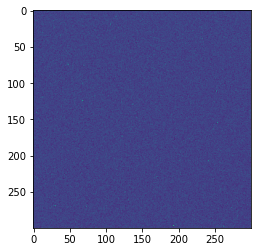

In [40]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 4s 16b/diffused flats G100 4s 16b_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 4s 16b/diffused flats G100 4s 16b_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 4662.569955555555
90000
90000.0
169.89365327087398


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.1615366419525378, 4662.569955555555, 28863.85342172395)

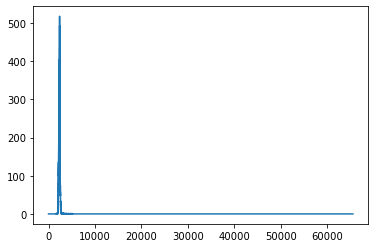

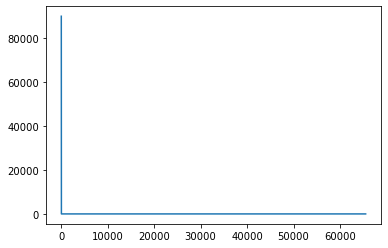

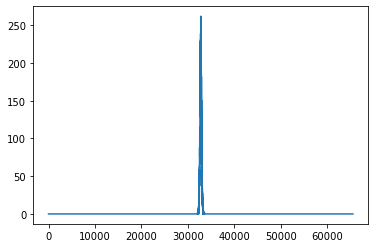

In [41]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

Filename: Test/Test/2 march/diffused flats G100 8s 16b/diffused flats G100 8s 16b_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   int16   
[[2325 2300 2197 ... 2036 2222 2209]
 [2222 2184 2110 ... 2428 2044 2189]
 [2275 2312 2411 ... 2298 2263 2189]
 ...
 [2238 2279 2101 ... 2047 2077 2378]
 [2102 2176 2283 ... 2222 2308 2246]
 [2077 2300 2341 ... 2230 2201 2065]]
[[2552 2288 2411 ... 2325 2321 2481]
 [2197 2172 2494 ... 2288 2106 2172]
 [2118 2362 2142 ... 2263 2205 2234]
 ...
 [2172 2403 2237 ... 2178 2411 2246]
 [2090 2246 2370 ... 2378 2321 2259]
 [1949 2321 2147 ... 2106 2329 2283]]


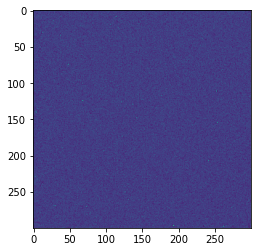

In [42]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 8s 16b/diffused flats G100 8s 16b_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 8s 16b/diffused flats G100 8s 16b_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 4543.163944444443
90000
90000.0
163.946057937115


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.1690271434152498, 4543.163944444443, 26878.30991311987)

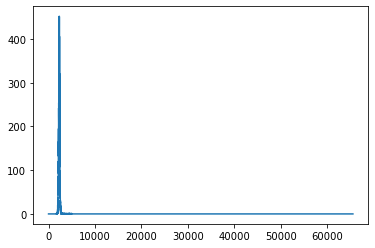

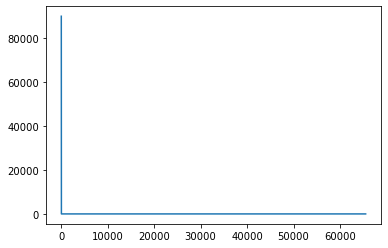

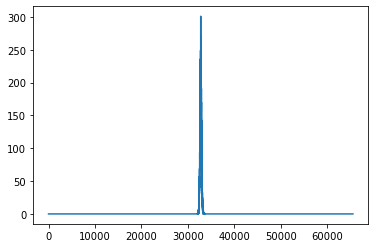

In [43]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

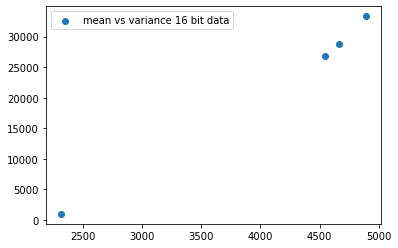

In [44]:
plt.scatter([2318.88, 4888.39, 4662.57, 4543.16],[986.55, 33336.22, 28863.85,26878.31], label = "mean vs variance 16 bit data")
plt.legend()

# # 16 bit data (1)

Filename: Test/Test/2 march/diffused flats G100 1s 16b(1)/diffused flats G100 1s 16b_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   int16   
[[4152 4251 4565 ... 4152 4103 4350]
 [4532 4202 4235 ... 4152 4086 4152]
 [4532 3921 4263 ... 4406 4383 4152]
 ...
 [4350 4086 4534 ... 3920 4317 4614]
 [4334 4268 4284 ... 4202 4499 4416]
 [4169 4202 4334 ... 4350 4499 4268]]
[[2184 2366 2131 ... 2382 2110 2098]
 [2131 2246 2316 ... 2250 2081 2061]
 [2143 2292 2215 ... 1996 2304 2242]
 ...
 [2168 2230 2129 ... 2140 2156 2279]
 [2052 2279 2085 ... 2217 2143 2345]
 [2139 2160 2209 ... 2304 2296 2279]]


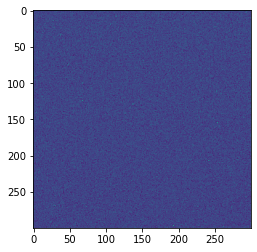

In [45]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 1s 16b(1)/diffused flats G100 1s 16b_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 1s 16b(1)/diffused flats G100 1s 16b_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 6459.8705000000045
90000
90000.0
232.15316518750433


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.11986008832169198, 6459.8705000000045, 53895.092106576674)

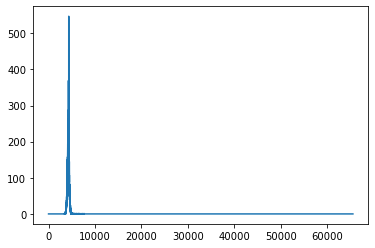

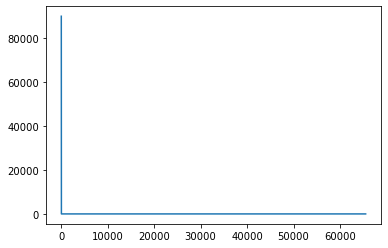

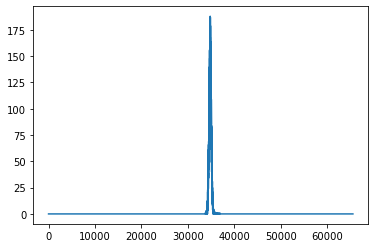

In [46]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

Filename: Test/Test/2 march/diffused flats G100 2s 16b(1)/diffused flats G100 2s 16b_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   int16   
[[2127 2164 2242 ... 2189 2180 2007]
 [2003 2151 2184 ... 2321 2003 2259]
 [2032 2176 1993 ... 2229 2189 2061]
 ...
 [1982 2184 1899 ... 2161 1999 2172]
 [2007 2189 2201 ... 2114 2354 2222]
 [2143 2230 1966 ... 2131 2321 2131]]
[[4532 4136 4449 ... 4317 4515 4350]
 [4383 4829 4202 ... 4367 4218 4383]
 [4202 4367 4139 ... 4450 4185 4301]
 ...
 [4053 4284 3671 ... 4234 4136 4070]
 [4251 4350 4565 ... 4218 4433 4334]
 [4235 4317 4251 ... 4317 4202 4532]]


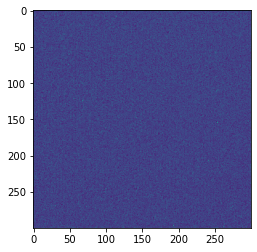

In [47]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 2s 16b(1)/diffused flats G100 2s 16b_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 2s 16b(1)/diffused flats G100 2s 16b_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 6446.113944444447
90000
90000.0
232.69704636635075


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.11904639169022958, 6446.113944444447, 54147.91538762359)

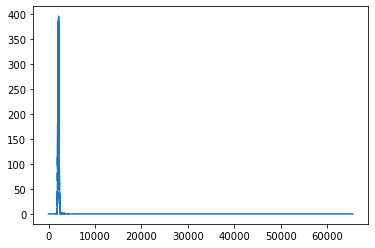

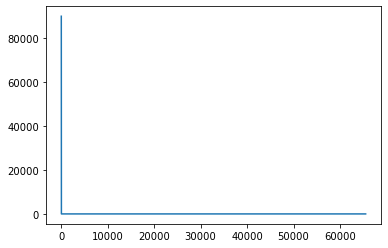

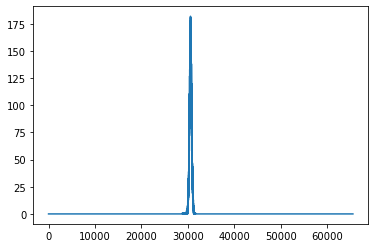

In [48]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

Filename: Test/Test/2 march/diffused flats G100 4s 16b(1)/diffused flats G100 4s 16b_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   int16   
[[4350 4466 4400 ... 4317 4466 3987]
 [4136 4284 4103 ... 4152 4251 4169]
 [4350 4400 4019 ... 4138 4400 4383]
 ...
 [4218 4416 4417 ... 4428 4664 4532]
 [4086 4152 4136 ... 4565 4185 4631]
 [4086 4235 4515 ... 4202 4334 4218]]
[[4119 4400 3971 ... 3954 4367 4400]
 [4251 4169 4350 ... 3905 4598 4416]
 [4251 4235 4099 ... 4495 4202 4152]
 ...
 [4350 4548 3833 ... 3870 4136 4251]
 [4218 4169 4235 ... 4598 4284 4614]
 [4301 4367 4301 ... 4136 4086 4086]]


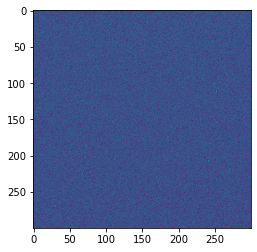

In [49]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 4s 16b(1)/diffused flats G100 4s 16b_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 4s 16b(1)/diffused flats G100 4s 16b_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 8557.044211111113
90000
90000.0
281.04758284955795


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.10833382239663397, 8557.044211111113, 78987.74382557915)

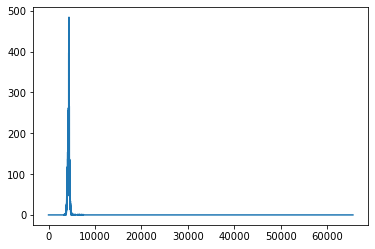

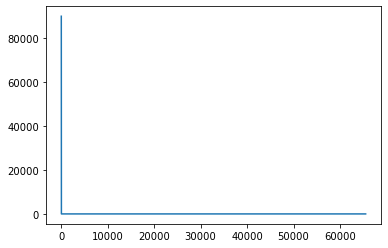

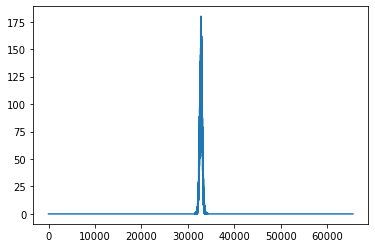

In [50]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

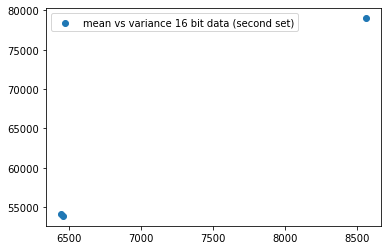

In [51]:
plt.scatter([6459.87, 6446.11, 8557.04],[53895.09, 54147.92,78987.74], label = "mean vs variance 16 bit data (second set)")
plt.legend()

# # 8 bit data

Filename: Test/Test/2 march/diffused flat G100 1s/diffused flat G100 1s_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   uint8   
[[19 16 15 ... 15 15 17]
 [16 14 16 ... 15 15 15]
 [15 16 14 ... 14 15 14]
 ...
 [16 15 15 ... 13 16 16]
 [16 14 15 ... 14 14 15]
 [15 14 17 ... 16 15 15]]
[[15 18 16 ... 15 14 16]
 [15 15 18 ... 16 15 16]
 [17 15 17 ... 14 16 15]
 ...
 [15 15 13 ... 13 17 14]
 [15 15 17 ... 15 15 13]
 [15 17 16 ... 17 15 16]]


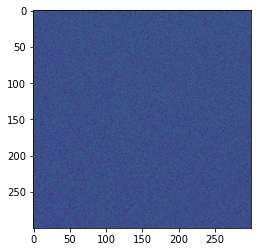

In [52]:
data1 = fits.open("Test/Test/2 march/diffused flat G100 1s/diffused flat G100 1s_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flat G100 1s/diffused flat G100 1s_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 29.24903333333334
90000
90000.0
1.5320330950475536


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(12.461640643268044, 29.24903333333334, 2.347125404320986)

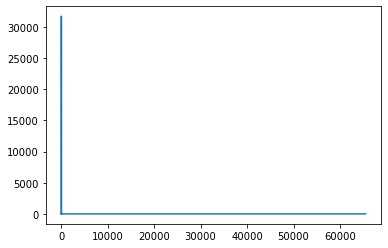

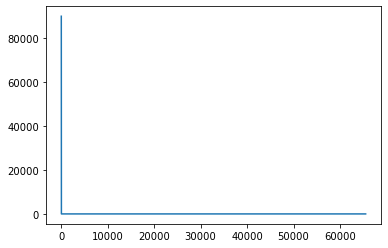

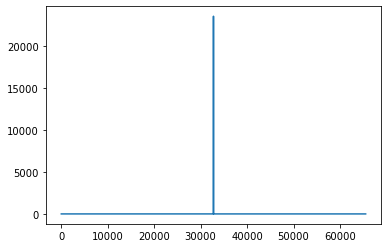

In [53]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

Filename: Test/Test/2 march/diffused flats G100 2s/diffused flats G100 2s_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   uint8   
[[36 41 37 ... 37 34 39]
 [35 36 38 ... 36 37 37]
 [36 37 36 ... 36 37 35]
 ...
 [37 36 35 ... 36 38 37]
 [35 35 36 ... 36 35 37]
 [38 37 38 ... 38 35 38]]
[[37 35 33 ... 39 38 36]
 [38 38 37 ... 38 35 37]
 [36 37 35 ... 33 39 35]
 ...
 [35 38 32 ... 35 35 37]
 [37 36 35 ... 35 38 39]
 [38 34 38 ... 38 37 36]]


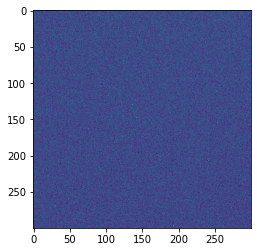

In [54]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 2s/diffused flats G100 2s_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 2s/diffused flats G100 2s_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 71.43677777777779
90000
90000.0
2.2141908361217273


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(14.571080550564874, 71.43677777777779, 4.902641058765433)

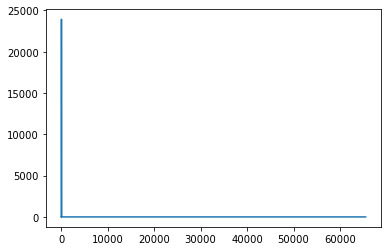

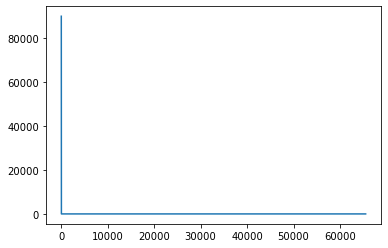

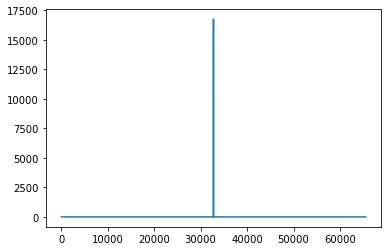

In [55]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

Filename: Test/Test/2 march/diffused flats G100 4s/diffused flats G100 4s_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   uint8   
[[82 80 80 ... 78 81 79]
 [80 80 81 ... 75 81 80]
 [79 78 79 ... 76 80 80]
 ...
 [79 78 79 ... 79 81 79]
 [76 77 78 ... 80 80 83]
 [81 78 76 ... 82 85 78]]
[[76 78 78 ... 81 82 80]
 [83 81 77 ... 79 75 79]
 [81 80 79 ... 75 81 79]
 ...
 [80 77 80 ... 78 79 80]
 [79 81 80 ... 79 82 80]
 [79 81 81 ... 79 78 79]]


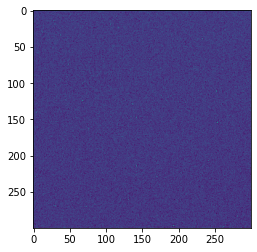

In [56]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 4s/diffused flats G100 4s_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 4s/diffused flats G100 4s_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 156.97865555555558
90000
90000.0
3.2726425896936164


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(14.65694470338048, 156.97865555555558, 10.71018951987654)

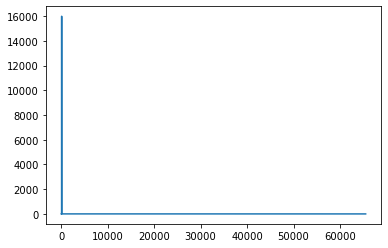

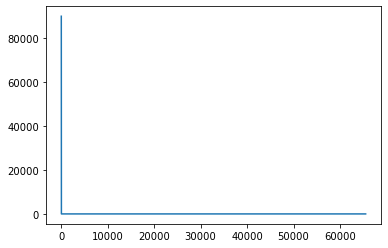

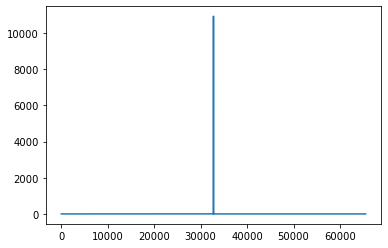

In [57]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

Filename: Test/Test/2 march/diffused flats G100 8s/diffused flats G100 8s_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   uint8   
[[158 160 161 ... 157 162 160]
 [164 156 163 ... 158 164 155]
 [162 158 154 ... 158 158 161]
 ...
 [162 161 158 ... 153 160 166]
 [165 158 163 ... 162 158 161]
 [158 161 161 ... 165 162 160]]
[[188 187 193 ... 183 186 188]
 [190 185 186 ... 189 188 186]
 [189 189 186 ... 184 185 185]
 ...
 [185 185 188 ... 186 194 190]
 [189 187 193 ... 188 187 191]
 [187 188 187 ... 195 186 187]]


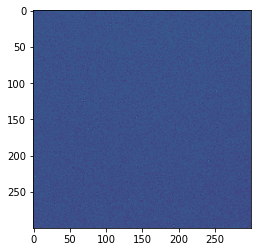

In [58]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 8s/diffused flats G100 8s_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 8s/diffused flats G100 8s_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 343.27623333333327
90000
90000.0
5.422735162156537


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(11.673657489979725, 343.27623333333327, 29.406056638888888)

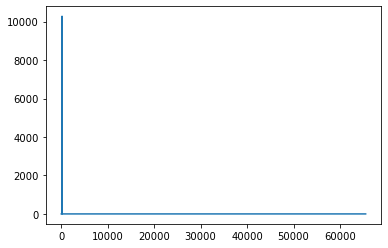

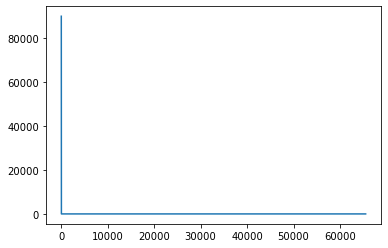

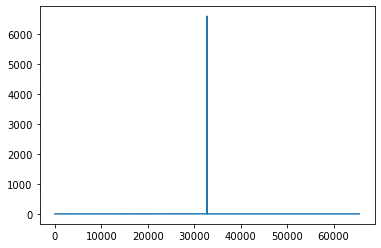

In [59]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

Filename: Test/Test/2 march/diffused flats G100 12s/diffused flats G100 12s_0000.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (1920, 1200)   uint8   
[[200 203 203 ... 206 195 207]
 [200 207 208 ... 196 202 207]
 [208 199 209 ... 197 200 198]
 ...
 [197 197 197 ... 196 206 204]
 [201 205 203 ... 199 207 207]
 [205 195 210 ... 202 202 199]]
[[204 208 209 ... 202 199 205]
 [201 201 199 ... 203 203 200]
 [207 207 203 ... 196 195 200]
 ...
 [201 199 197 ... 204 202 210]
 [202 203 197 ... 210 202 210]
 [198 204 200 ... 203 205 203]]


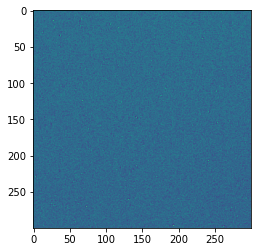

In [60]:
data1 = fits.open("Test/Test/2 march/diffused flats G100 12s/diffused flats G100 12s_0000.fit")
data2 = fits.open("Test/Test/2 march/diffused flats G100 12s/diffused flats G100 12s_0001.fit")
bdata1 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
bdata2 = fits.open("Test/Test/2 march/bias G100 0.01ms 16b/bias G100 0.01ms 16b_0000.fit")
data1.info()
startr = 0
stopr = 300
startc = 0
stopc = 300
img1 = np.uint16(data1[0].data)
img2 = np.uint16(data2[0].data)
bias1 = np.uint16(bdata1[0].data)
bias2 = np.uint16(bdata2[0].data)
print(img1)
print(img2)

img1 = img1[startr:stopr,startc:stopc]
img2 = img2[startr:stopr,startc:stopc]
bias1 = bias1[startr:stopr,startc:stopc]
bias2 = bias2[startr:stopr,startc:stopc]
plt.imshow(img1)

uint16
avg flat pixel 401.4889111111113
90000
90000.0
5.3864786992782


d:\code\py install\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(13.837692045883747, 401.4889111111113, 29.01415277777777)

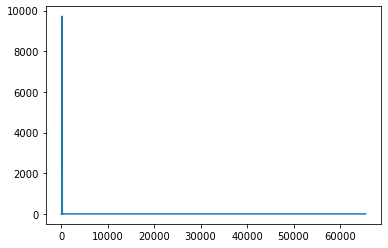

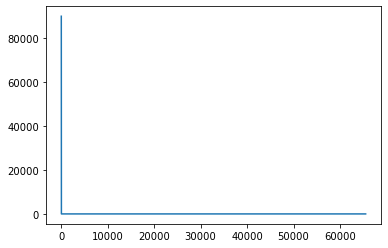

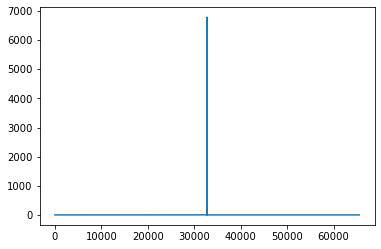

In [61]:
print(img1.dtype)
calcGain(img1,img2,bias1,bias2,16,1)

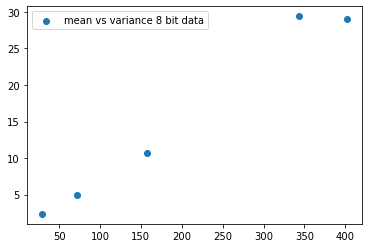

In [62]:
plt.scatter([29.25,71.44,156.98,343.28,401.49],[2.35,4.9,10.71,29.41,29.01], label = "mean vs variance 8 bit data")
plt.legend()